In [1]:
import os
import sys
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)

In [3]:
from src.models.fcn_model import FCNModel
from src.models.cnn_model import CNNModel
from src.models.transformer_model import TransformerModel
from src.models.xgboost_model import XGBoostModel
from src.data.feature_selection import pca_feature_selection
from src.data.dataset_loader import DatasetLoader
from src.utils.load_config import config

from src.deployment.predictor import Predictor
from src.evaluation.evaluate import evaluate_regression

In [4]:
# Load and preprocess data
loader = DatasetLoader(config["data"]["dataset_path"])
X, y = loader.get_data()

2025-03-15 21:59:26 [INFO] src.data.dataset_loader - Loaded dataset with shape: (500, 449)
2025-03-15 21:59:26 [DEBUG] src.data.dataset_loader - Dataset head:
                       0         1         2         3         4         5  \
hsi_id                                                                       
imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

                       6         7         8         9  ...       439  \
hsi_id                                                  ...             
imagoai_corn_0  0.355226  0.343350  0.344837  0.361567  ...  0.710280   
imagoai_corn_1  0.375671  0.363689  0.373883  0.359674  ...  0.684011   
im

In [5]:
# Optional: reduce dimension via PCA or other
# X = pca_feature_selection(X, n_components=config["data"]["selected_features"])

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=config["training"]["validation_split"], random_state=42)

In [7]:
results = []

Epoch [1/1000] | Train Loss: 153725537.5000 | Val Loss: 298977832.9600
Epoch [2/1000] | Train Loss: 153682124.9600 | Val Loss: 298857511.6800
Epoch [3/1000] | Train Loss: 153539373.1400 | Val Loss: 298473619.2000
Epoch [4/1000] | Train Loss: 153157178.3600 | Val Loss: 297516590.0800
Epoch [5/1000] | Train Loss: 152169475.1250 | Val Loss: 295491339.5200
Epoch [6/1000] | Train Loss: 150609707.7200 | Val Loss: 292313451.5200
Epoch [7/1000] | Train Loss: 148202749.3500 | Val Loss: 288196296.9600
Epoch [8/1000] | Train Loss: 146247063.2400 | Val Loss: 284712061.4400
Epoch [9/1000] | Train Loss: 144358845.1200 | Val Loss: 283100513.2800
Epoch [10/1000] | Train Loss: 144636993.9200 | Val Loss: 282522670.0800
Epoch [11/1000] | Train Loss: 145005535.5200 | Val Loss: 282956001.2800
Epoch [12/1000] | Train Loss: 144227787.8400 | Val Loss: 282869916.1600
Epoch [13/1000] | Train Loss: 144636200.1600 | Val Loss: 283283255.0400
Epoch [14/1000] | Train Loss: 144237376.4000 | Val Loss: 283416414.7200
E

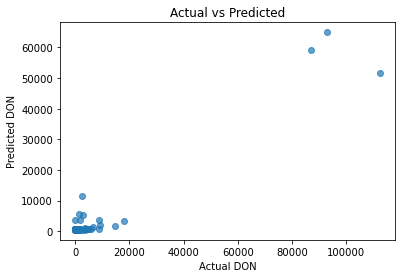

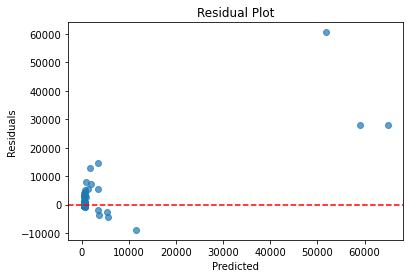

FCN -> MAE: 2558.4258, RMSE: 7780.5983, R2: 0.7834


In [8]:
# Model: FCN
fcn_params = config["model"]["fcn"]
fcn_model = FCNModel(fcn_params)
fcn_model.train(X_train, y_train, X_val, y_val)

fcn_save_path = config["deployment"]["fcn_model_path"]
fcn_model.save_model(fcn_save_path)

predictor_fcn = Predictor(model_type="fcn")
preds_fcn = predictor_fcn.predict(X_val)

metrics_fcn = evaluate_regression(y_val, preds_fcn, model="fcn", plot=True)
results.append(["FCN", metrics_fcn["MAE"], metrics_fcn["RMSE"], metrics_fcn["R2"]])

print(f"FCN -> MAE: {metrics_fcn['MAE']:.4f}, RMSE: {metrics_fcn['RMSE']:.4f}, R2: {metrics_fcn['R2']:.4f}")

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


../models/best_xgboost.pkl


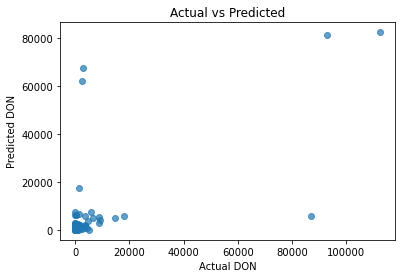

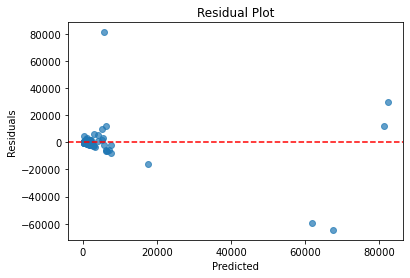

XGBoost -> MAE: 4093.8741, RMSE: 12740.7058, R2: 0.4193


In [9]:
# Model: XGBoost
xgb_params = config["model"]["xgboost"]
xgb_model = XGBoostModel(xgb_params)
xgb_model.train(X_train, y_train, X_val, y_val)

xgb_save_path = config["deployment"]["xgboost_model_path"]
xgb_model.save_model(xgb_save_path)

predictor_xgb = Predictor(model_type="xgboost")
preds_xgb = predictor_xgb.predict(X_val)

metrics_xgb = evaluate_regression(y_val, preds_xgb, model="xgboost", plot=True)
results.append(["XGBoost", metrics_xgb["MAE"], metrics_xgb["RMSE"], metrics_xgb["R2"]])

print(f"XGBoost -> MAE: {metrics_xgb['MAE']:.4f}, RMSE: {metrics_xgb['RMSE']:.4f}, R2: {metrics_xgb['R2']:.4f}")

In [10]:
# Model: CNN
cnn_params = config["model"]["cnn"]
cnn_model = CNNModel(cnn_params)
cnn_model.train(X_train, y_train, X_val, y_val)

cnn_save_path = config["deployment"]["cnn_model_path"]
cnn_model.save_model(cnn_save_path)

predictor_cnn = Predictor(model_type="cnn")
preds_cnn = predictor_cnn.predict(X_val)

metrics_cnn = evaluate_regression(y_val, preds_cnn, model="cnn", plot=True)
results.append(["CNN", metrics_cnn["MAE"], metrics_cnn["RMSE"], metrics_cnn["R2"]])

print(f"CNN -> MAE: {metrics_cnn['MAE']:.4f}, RMSE: {metrics_cnn['RMSE']:.4f}, R2: {metrics_cnn['R2']:.4f}")

Epoch [1/1000] | Train Loss: 153324655.6800 | Val Loss: 297061388.8000
Epoch [2/1000] | Train Loss: 151083113.6800 | Val Loss: 291167390.7200
Epoch [3/1000] | Train Loss: 146524732.4000 | Val Loss: 284104216.3200
Epoch [4/1000] | Train Loss: 144112679.9600 | Val Loss: 281589392.6400
Epoch [5/1000] | Train Loss: 144458894.6800 | Val Loss: 281713802.2400
Epoch [6/1000] | Train Loss: 144317872.7800 | Val Loss: 282741999.3600
Epoch [7/1000] | Train Loss: 144343330.7400 | Val Loss: 283412048.6400
Epoch [8/1000] | Train Loss: 144304253.4000 | Val Loss: 282736930.5600
Epoch [9/1000] | Train Loss: 144224821.9000 | Val Loss: 282854796.8000
Epoch [10/1000] | Train Loss: 144247087.3200 | Val Loss: 282726260.4800
Epoch [11/1000] | Train Loss: 144122074.4400 | Val Loss: 282315164.1600
Epoch [12/1000] | Train Loss: 144005157.1200 | Val Loss: 282037806.0800
Epoch [13/1000] | Train Loss: 143978752.4800 | Val Loss: 281894388.4800
Epoch [14/1000] | Train Loss: 144032606.4800 | Val Loss: 281916407.0400
E

RuntimeError: Error(s) in loading state_dict for CNNRegressor:
	size mismatch for fc.weight: copying a param with shape torch.Size([1, 57344]) from checkpoint, the shape in current model is torch.Size([1, 114688]).

In [ ]:
# # Model: Transformer (placeholder if you have a real training loop)
# trans_params = config["model"]["transformer"]
# trans_model = TransformerModel(trans_params)
# trans_model.train(X_train, y_train, X_val, y_val)

# trans_save_path = config["deployment"]["transformer_model_path"]
# trans_model.save_model(trans_save_path)

# predictor_trans = Predictor(model_type="transformer", model_path=trans_save_path)
# preds_trans = predictor_trans.predict(X_val)

# metrics_trans = evaluate_regression(y_val, preds_trans, model="transformer", plot=True)
# results.append(["Transformer", metrics_trans["MAE"], metrics_trans["RMSE"], metrics_trans["R2"]])

# print(f"Transformer -> MAE: {metrics_trans['MAE']:.4f}, RMSE: {metrics_trans['RMSE']:.4f}, R2: {metrics_trans['R2']:.4f}")

In [ ]:
df_results = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
df_results

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Comparison of MAE on Validation Set")

bar_x = np.arange(len(results))
mae_values = df_results["MAE"].values

plt.bar(bar_x, mae_values)
plt.xticks(bar_x, df_results["Model"])
plt.ylabel("MAE")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Comparison of RMSE on Validation Set")

rmse_values = df_results["RMSE"].values
plt.bar(bar_x, rmse_values)
plt.xticks(bar_x, df_results["Model"])
plt.ylabel("RMSE")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Comparison of R2 on Validation Set")

r2_values = df_results["R2"].values
plt.bar(bar_x, r2_values)
plt.xticks(bar_x, df_results["Model"])
plt.ylabel("R² Score")
plt.show()